<a href="https://colab.research.google.com/github/ashutosh7599/Glaucoma-detection-multi-texture-analysis/blob/main/modelTrainor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/acrima"

test  train


In [3]:
classes_dir = ['glaucoma', 'sanas'] #total labels
drivePath = '/content/drive/My Drive/acrima/'

In [ ]:
!rm -rf /content/data


import shutil
import os
import random
import numpy as np
root_dir = '/content/drive/My Drive/ORIGA/originales/' # data root path
contentDir = '/content/data/'

val_ratio = 0.10
# test_ratio = 0.05

for cls in classes_dir:
    os.makedirs(contentDir +'train/' + cls)
    os.makedirs(contentDir +'val/' + cls)
    os.makedirs(contentDir +'test/' + cls)


src = root_dir + cls 

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                           int(len(allFileNames)* (1 - test_ratio))])


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))

# Copy-pasting images
for name in train_FileNames:
    shutil.copy(name, contentDir +'train/' + cls)

for name in val_FileNames:
    shutil.copy(name, contentDir +'val/' + cls)

# for name in test_FileNames:
#     shutil.copy(name, contentDir +'test/' + cls)


Total images:  482
Training:  385
Validation:  72
Testing:  25


In [4]:
!ls "/content/data/test/glaucoma/"

ls: cannot access '/content/data/test/glaucoma/': No such file or directory


In [4]:
trainPath = drivePath + 'train/'
testPath =  drivePath + 'test/'

In [5]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import *
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dense, Flatten
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import History 
history = History()

In [6]:
trainData = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True).flow_from_directory(trainPath, target_size=(224,224), classes =classes_dir)
testData = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True).flow_from_directory(testPath, target_size=(224,224), classes =classes_dir)
       
# validationData = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
#        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
#        channel_shift_range=10., horizontal_flip=True).flow_from_directory('/content/valData/', target_size=(224,224), classes =classes_dir)

Found 647 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


In [7]:
vgg16 = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 9s 0us/step


In [8]:
type(vgg16)

tensorflow.python.keras.engine.functional.Functional

In [9]:
model_vgg16 = Sequential()
for l in vgg16.layers[:-1]:
    model_vgg16.add(l)

In [10]:
for l in model_vgg16.layers:
    l.trainable = False

In [11]:
model_vgg16.add(Dense(2, activation='softmax'))

In [12]:
model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [13]:
model_vgg16.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')

In [ ]:
history_vgg16 = model_vgg16.fit(trainData,validation_data=testData,epochs=40,verbose=1, callbacks=[checkpoint])

Epoch 1/40
21/21 [==============================] - ETA: 0s - loss: 0.7279 - accuracy: 0.5703
Epoch 00001: accuracy improved from -inf to 0.57032, saving model to vgg16_1.h5
21/21 [==============================] - 213s 10s/step - loss: 0.7279 - accuracy: 0.5703 - val_loss: 0.5926 - val_accuracy: 0.6552
Epoch 2/40
21/21 [==============================] - ETA: 0s - loss: 0.4721 - accuracy: 0.7759
Epoch 00002: accuracy improved from 0.57032 to 0.77589, saving model to vgg16_1.h5
21/21 [==============================] - 14s 674ms/step - loss: 0.4721 - accuracy: 0.7759 - val_loss: 0.4614 - val_accuracy: 0.7586
Epoch 3/40
21/21 [==============================] - ETA: 0s - loss: 0.4044 - accuracy: 0.8114
Epoch 00003: accuracy improved from 0.77589 to 0.81144, saving model to vgg16_1.h5
21/21 [==============================] - 13s 642ms/step - loss: 0.4044 - accuracy: 0.8114 - val_loss: 0.4558 - val_accuracy: 0.7759
Epoch 4/40
21/21 [==============================] - ETA: 0s - loss: 0.3634 - 

In [ ]:
!wget https://deepblue.lib.umich.edu/data/downloads/0r967457f.zip

In [ ]:
!unzip 0r967457f

In [ ]:
!wget https://www5.cs.fau.de/fileadmin/research/datasets/fundus-images/healthy.zip

In [ ]:
!unzip healthy.zip -d valData/sanas

In [ ]:
!wget https://www5.cs.fau.de/fileadmin/research/datasets/fundus-images/glaucoma.zip

In [ ]:
!unzip glaucoma.zip -d valData/glaucoma

In [ ]:
!mkdir valData

In [ ]:
!mkdir valData/glaucoma

In [ ]:
!mkdir valData/sanas

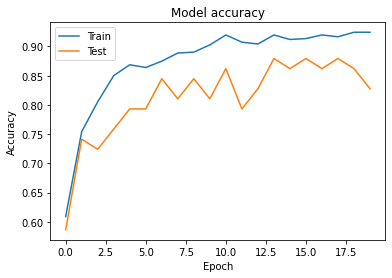

In [51]:
import matplotlib.pyplot as plt
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

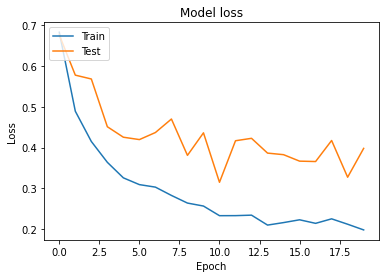

In [52]:
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [53]:
vgg19 = keras.applications.vgg19.VGG19()

574717952/574710816 [==============================] - 20s 0us/step


In [54]:
type(vgg19)


tensorflow.python.keras.engine.functional.Functional

In [55]:
model_vgg19 = Sequential()
for layer in vgg19.layers[:-1]:
    model_vgg19.add(layer)

In [56]:
for layer in model_vgg19.layers:
    layer.trainable = False

In [57]:
model_vgg19.add(Dense(2, activation='softmax'))

In [60]:
model_vgg19.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [61]:
model_vgg19.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
checkpoint_vgg19 = ModelCheckpoint("vgg19_1.h5", monitor='accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')


In [64]:

history_vgg19 = model_vgg19.fit(trainData,validation_data=testData,epochs=40,verbose=1, callbacks=[checkpoint_vgg19])


Epoch 1/2
21/21 [==============================] - ETA: 0s - loss: 1.1624 - accuracy: 0.3957
Epoch 00001: accuracy improved from -inf to 0.39567, saving model to vgg19_1.h5
21/21 [==============================] - 14s 657ms/step - loss: 1.1624 - accuracy: 0.3957 - val_loss: 0.8512 - val_accuracy: 0.5000
Epoch 2/2
21/21 [==============================] - ETA: 0s - loss: 0.7541 - accuracy: 0.5456
Epoch 00002: accuracy improved from 0.39567 to 0.54560, saving model to vgg19_1.h5
21/21 [==============================] - 13s 635ms/step - loss: 0.7541 - accuracy: 0.5456 - val_loss: 0.6918 - val_accuracy: 0.6379
